<a href="https://colab.research.google.com/github/Khushibung05/Hypothesis-Testing-Statistical-Inference/blob/main/Hypothesis_Testing_%26_Statistical_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
import pandas as pd
df= sns.load_dataset("taxis")
print(df.head())
print(df.shape)
print(df.columns)


               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      

In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [5]:
df.describe(include=object)


,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


In [6]:
df.isna().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [7]:
(df.isna().sum()/df.shape[0])*100

,0
pickup,0.000000
dropoff,0.000000
passengers,0.000000
distance,0.000000
fare,0.000000
tip,0.000000
tolls,0.000000
total,0.000000
color,0.000000
payment,0.683973


In [8]:
df.shape[0]-df.dropna().shape[0] #removed 92 from 6433 records

92

In [9]:
((df.shape[0]-df.dropna().shape[0])/df.shape[0])*100 #removing or data loos %

1.4301259132597544

In [10]:
df.dropna()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [11]:
df=df.dropna() #removing null value records
df.shape

(6341, 14)

In [12]:
df.reset_index(drop=True)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6337,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6338,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6339,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [13]:
df.describe(include=object)

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6341,6341,6341,6341,6341,6341
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5373,4546,227,244,5226,5172


In [14]:
df.isna().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,0


conc: no null values present

#EDA
###tip is the target column
###"tip" -> numerical feature that is to be analysed with "color"-> categorical feature

In [15]:
df.color.value_counts()

,count
color,
yellow,5373
green,968


### since there are 2 unique categories of color
###to analyse with graphical analysis
###mean of 5373 yellows and mean of 968 green
###same with std

<Axes: xlabel='color', ylabel='tip'>

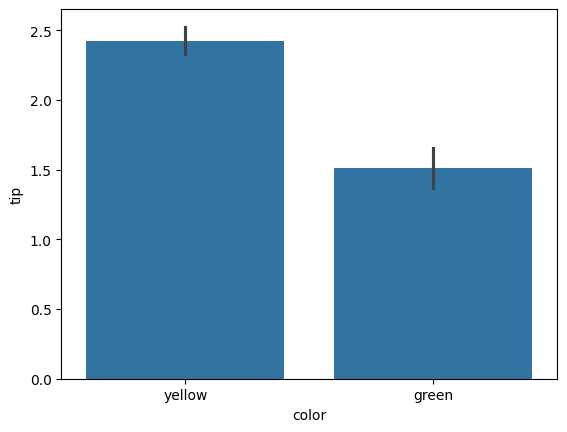

In [16]:
sns.barplot(x=df.color,y=df.tip,estimator='std')


<Axes: xlabel='color', ylabel='tip'>

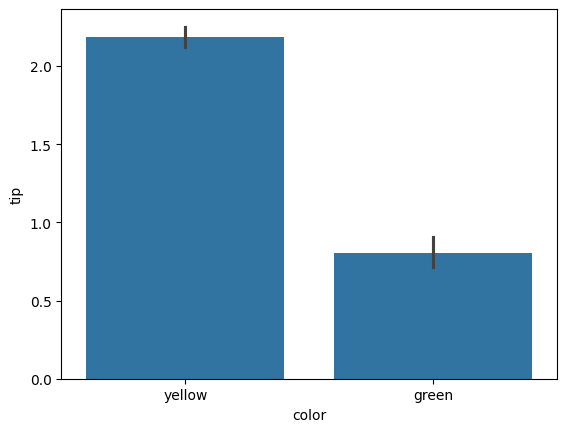

In [17]:
sns.barplot(x=df.color,y=df.tip,estimator='mean')


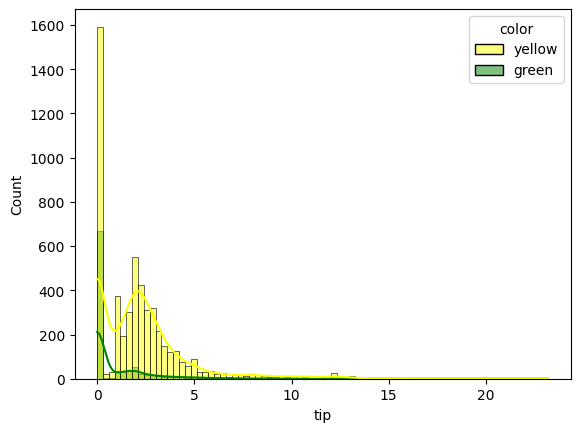

In [18]:
import matplotlib.pyplot as plt
sns.histplot(x=df.tip,hue=df.color,kde=True,palette=['yellow','green'])
plt.show()

The bar plots and histograms show that cab color has a significant impact on tipping behavior. Yellow cabs receive higher average tips with greater variability, while green cabs receive lower and more consistent tips. Hence, cab color is a useful categorical variable for analyzing and predicting tip amounts.

# T-Test

**Definition:** T-Test is used to compare means when the population variance is unknown or the sample size is small.

---

## Independent T-Test

**Hypotheses:**  
- H0: distrbution of tip for yellow =distribution of tip for green
- H1: distrbution of tip for yellow ≠ distrbution of tip for green


In [19]:
# Independent T-Test
from scipy import stats
yellow_tip= df['tip'][df['color'] == 'yellow']
green_tip = df['tip'][df['color'] == 'green']

t_stat, p_val = stats.ttest_ind(yellow_tip, green_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis : distrbution of tip for yellow category is different that of green")
else:
    print("Fail to reject null hypothesis: distrbution of tip for yellow =distribution of tip for green")


Independent T-Test statistic: 17.05932566128597
P-value: 7.791088119489451e-64
Reject null hypothesis : distrbution of tip for yellow category is different that of green


In [20]:
yellow_tip.shape

(5373,)

In [21]:
green_tip.shape

(968,)

###bivariate analysis
tip vs. payment

In [22]:
df.payment.value_counts()

,count
payment,
credit card,4546
cash,1795


<Axes: xlabel='payment', ylabel='tip'>

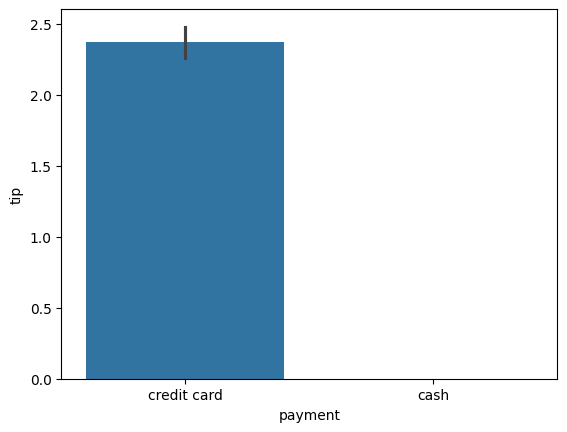

In [23]:
sns.barplot(x=df.payment,y=df.tip,estimator='std')

<Axes: xlabel='payment', ylabel='tip'>

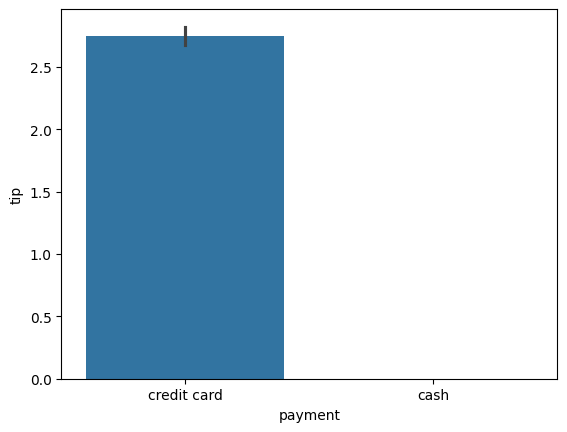

In [24]:
sns.barplot(x=df.payment,y=df.tip,estimator='mean')


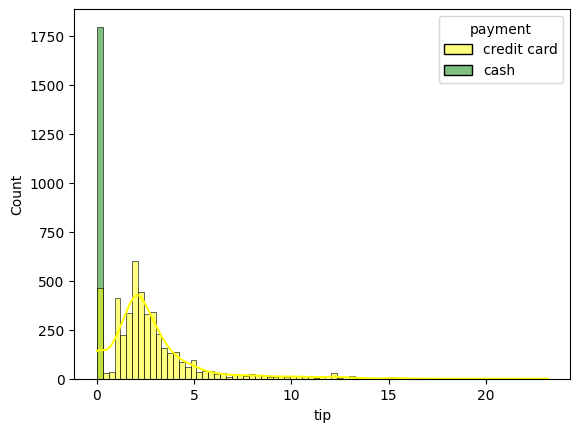

In [25]:
sns.histplot(x=df.tip,hue=df.payment,kde=True,palette=['yellow','green'])
plt.show()

In [26]:
# Independent T-Test
from scipy import stats
credit_card= df['tip'][df['payment'] == 'credit card']
cash = df['tip'][df['payment'] == 'cash']

t_stat, p_val = stats.ttest_ind(credit_card, cash)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis ")
else:
    print("Fail to reject null hypothesis ")


Independent T-Test statistic: 49.09538452722153
P-value: 0.0
Reject null hypothesis 


The analysis shows that payment method has a significant impact on tipping behavior. Credit card payments are associated with higher and more variable tips, while cash payments result in lower and more consistent tips. Histogram analysis confirms right-skewed distributions, and an independent t-test statistically validates that the mean tip differs significantly between payment methods.

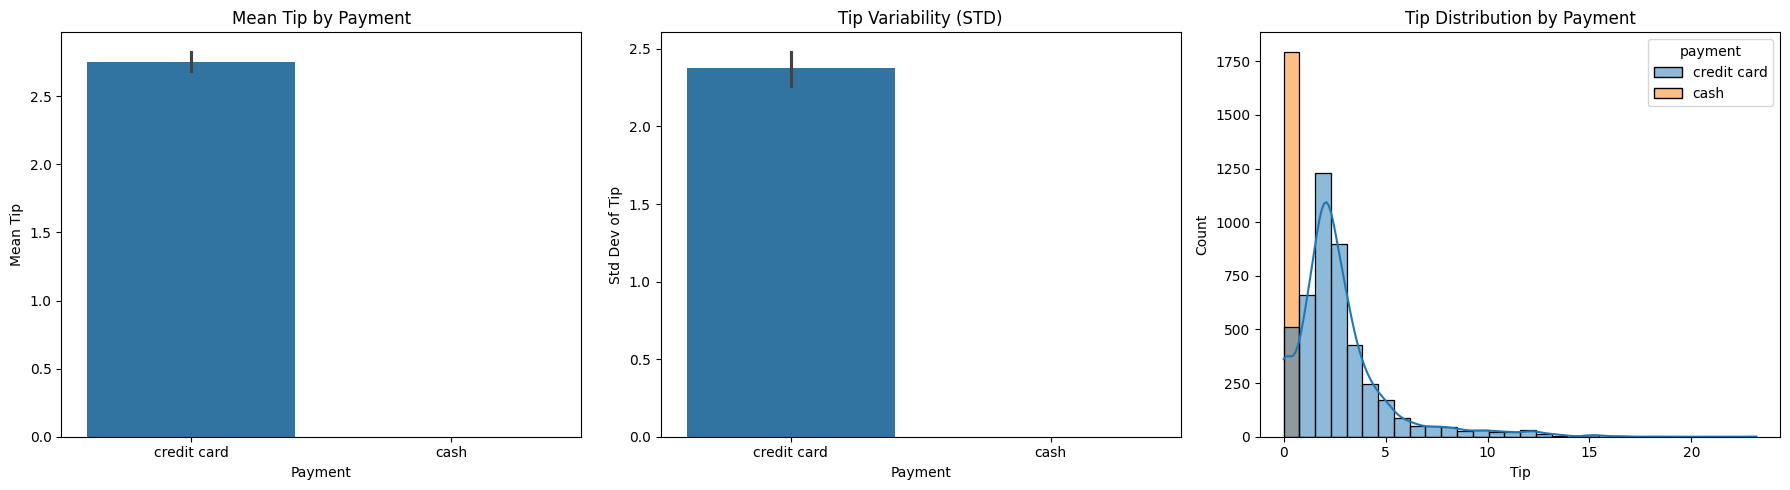

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ Mean tip by payment
sns.barplot(
    x='payment', y='tip', data=df,
    estimator='mean', ax=axes[0]
)
axes[0].set_title('Mean Tip by Payment')
axes[0].set_xlabel('Payment')
axes[0].set_ylabel('Mean Tip')

# 2️⃣ Std deviation of tip by payment
sns.barplot(
    x='payment', y='tip', data=df,
    estimator='std', ax=axes[1]
)
axes[1].set_title('Tip Variability (STD)')
axes[1].set_xlabel('Payment')
axes[1].set_ylabel('Std Dev of Tip')

# 3️⃣ Tip distribution
sns.histplot(
    data=df, x='tip', hue='payment',
    kde=True, bins=30, ax=axes[2]
)
axes[2].set_title('Tip Distribution by Payment')
axes[2].set_xlabel('Tip')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [28]:
df['pickup_borough'].unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn'], dtype=object)

In [29]:
df['pickup_borough'].value_counts()

,count
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


###univariate analysis

/tmp/ipython-input-3875852891.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pickup_borough'],palette='Set2')


<Axes: xlabel='pickup_borough', ylabel='count'>

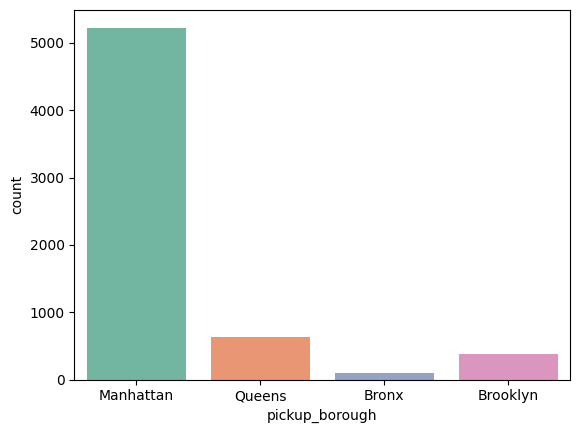

In [30]:

sns.countplot(x=df['pickup_borough'],palette='Set2')

/tmp/ipython-input-1961101355.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pickup_borough'],y=df['tip'],palette='Set1',estimator='std')


<Axes: xlabel='pickup_borough', ylabel='tip'>

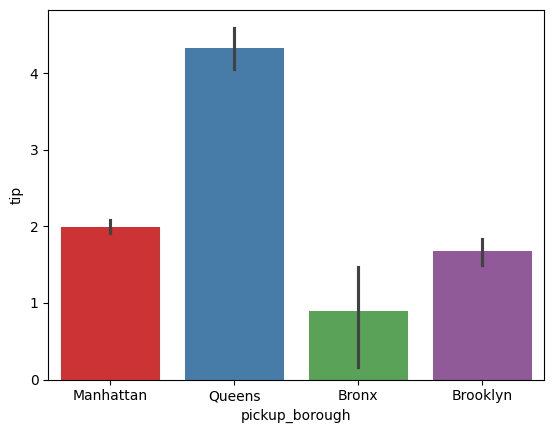

In [31]:
sns.barplot(x=df['pickup_borough'],y=df['tip'],palette='Set1',estimator='std')

In [32]:
df['tip'].groupby(df['pickup_borough']).std()


,tip
pickup_borough,
Bronx,0.897261
Brooklyn,1.674487
Manhattan,1.997736
Queens,4.323951


In [33]:
df['tip'].groupby(df['pickup_borough']).mean()

,tip
pickup_borough,
Bronx,0.148586
Brooklyn,0.979127
Manhattan,1.945597
Queens,3.066458


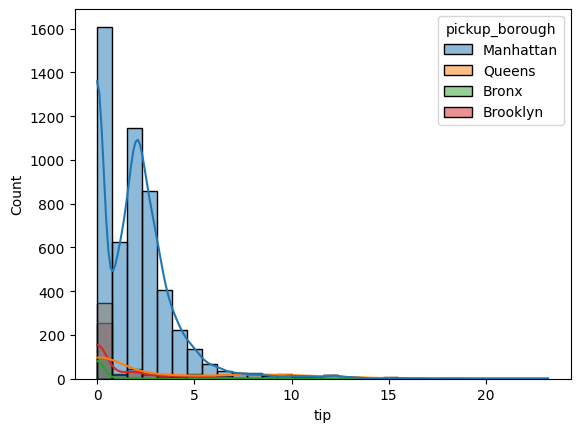

In [34]:
sns.histplot(hue=df['pickup_borough'],x=df['tip'],bins=30,kde=True)
plt.show()

# ANOVA Test

**Definition:** ANOVA (Analysis of Variance) compares means of **three or more groups**.  
  

**Hypotheses:**  
- H0: Mean is the same across all the pickup_borough categories
- H1: At least one category has a different distribution of tip


In [35]:
manhattan_tip=df['tip'][df['pickup_borough']=='Manhattan']
queens_tip=df['tip'][df['pickup_borough']=='Queens']
bronx_tip=df['tip'][df['pickup_borough']=='Bronx']
brooklyn_tip=df['tip'][df['pickup_borough']=='Brooklyn']


In [36]:
# ANOVA Test
from scipy import stats
f_stat, p_val = stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")



ANOVA F-statistic: 91.5793383185057
P-value: 5.155109332422435e-58
Reject null hypothesis


but anova test doesn't tell which grp is different so we go for post-hoc test



# Post-hoc Test: Tukey HSD

**Definition:** After ANOVA indicates a significant difference, Tukey HSD helps identify **which pairs of groups differ significantly**.  


**Hypotheses for Tukey test (for each pair of groups):**  

-H0:distribution of group 1 = distribution of group 2

-H1:distribution of group 1 != distribution of group 2


In [37]:
# Tukey HSD Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=df.tip, groups=df.pickup_borough, alpha=0.05)
print(tukey_result)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.1595 1.5015   True
    Bronx Manhattan    1.797   0.0  1.194    2.4   True
    Bronx    Queens   2.9179   0.0 2.2759 3.5599   True
 Brooklyn Manhattan   0.9665   0.0 0.6499  1.283   True
 Brooklyn    Queens   2.0873   0.0 1.7016 2.4731   True
Manhattan    Queens   1.1209   0.0 0.8716 1.3701   True
-------------------------------------------------------


# Interpretation

- The Tukey HSD table shows **all pairwise comparisons** between groups (Regions).  
- Columns explained:  
  - **meandiff:** Difference between group means  
  - **p-adj:** Adjusted p-value for multiple comparisons  
  - **reject:** True if H0 is rejected (means significantly different)  

###dropoff_borough vs. tip

/tmp/ipython-input-3711686064.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['dropoff_borough'],palette='Set2')


<Axes: xlabel='dropoff_borough', ylabel='count'>

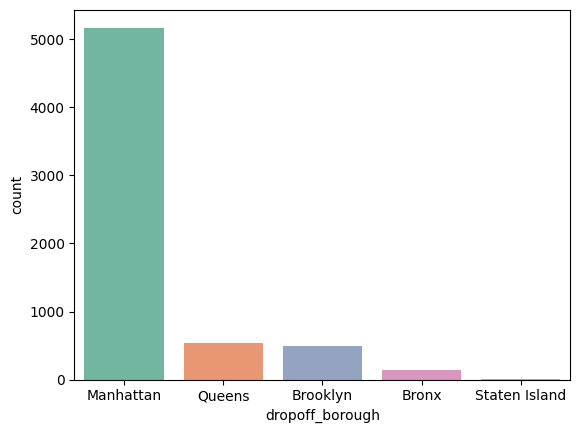

In [38]:
sns.countplot(x=df['dropoff_borough'],palette='Set2')

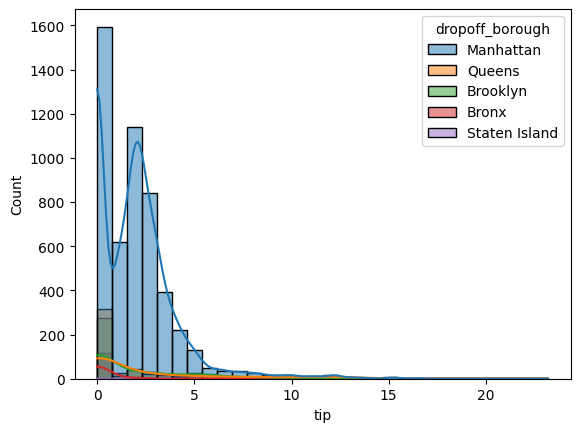

In [39]:
sns.histplot(hue=df['dropoff_borough'],x=df['tip'],bins=30,kde=True)
plt.show()

In [40]:
df['tip'].groupby(df['dropoff_borough']).std()


,tip
dropoff_borough,
Bronx,1.788795
Brooklyn,2.896229
Manhattan,2.052074
Queens,3.947016
Staten Island,2.976920


In [41]:
manhattan_tip1=df['tip'][df['dropoff_borough']=='Manhattan']
queens_tip1=df['tip'][df['dropoff_borough']=='Queens']
bronx_tip1=df['tip'][df['dropoff_borough']=='Bronx']
brooklyn_tip1=df['tip'][df['dropoff_borough']=='Brooklyn']
staten_island_tip1=df['tip'][df['dropoff_borough']=='Staten Island']


In [42]:
# ANOVA Test
from scipy import stats
f_stat, p_val = stats.f_oneway(manhattan_tip1,queens_tip1,bronx_tip1,brooklyn_tip1,staten_island_tip1)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")



ANOVA F-statistic: 31.42417796696829
P-value: 5.87859571331583e-26
Reject null hypothesis


In [43]:
# Tukey HSD Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=df.tip, groups=df.dropoff_borough, alpha=0.05)
print(tukey_result)


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  0.7691  2.0046   True
    Bronx     Manhattan   1.4296    0.0  0.8751  1.9842   True
    Bronx        Queens   1.8873    0.0  1.2742  2.5005   True
    Bronx Staten Island  13.6303    0.0  9.0833 18.1773   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.2571  0.3425  False
 Brooklyn        Queens   0.5004 0.0055  0.1026  0.8983   True
 Brooklyn Staten Island  12.2434    0.0  7.7204 16.7664   True
Manhattan        Queens   0.4577 0.0002  0.1675  0.7479   True
Manhattan Staten Island  12.2007    0.0  7.6859 16.7154   True
   Queens Staten Island   11.743    0.0  7.2206 16.2653   True
--------------------------------------------------------------


###pickup_zone vs. drop_zone

In [44]:
len(df['dropoff_zone'].unique())

203

In [45]:
len(df['pickup_zone'].unique())

194

/tmp/ipython-input-815587650.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pickup_zone'],palette='Set1')


<Axes: xlabel='pickup_zone', ylabel='count'>

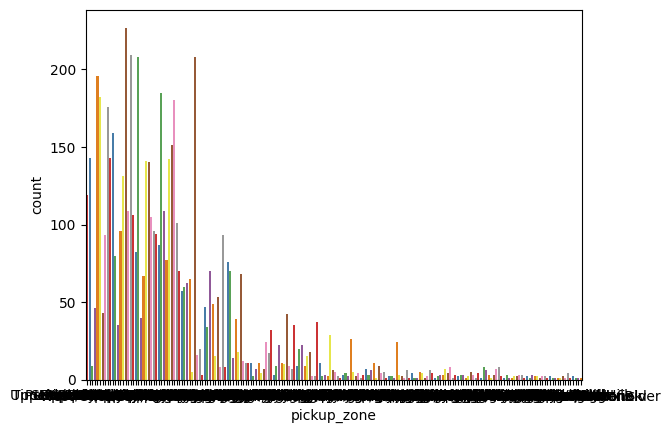

In [46]:
sns.countplot(x=df['pickup_zone'],palette='Set1')

/tmp/ipython-input-414242537.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['dropoff_zone'],palette='Set1')


<Axes: xlabel='dropoff_zone', ylabel='count'>

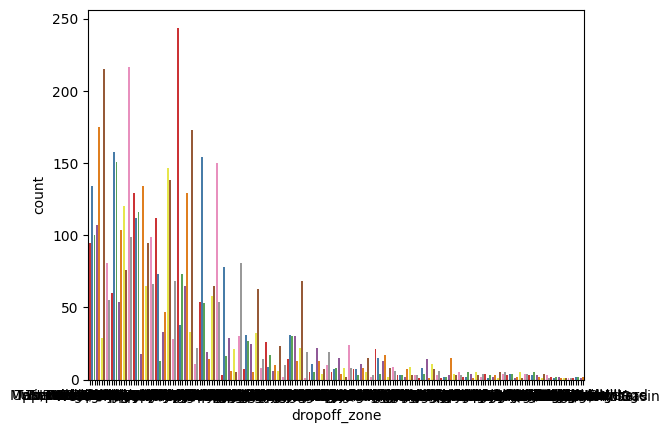

In [47]:
sns.countplot(x=df['dropoff_zone'],palette='Set1')

In [48]:
#ANOVA TEST
categories=[group['tip'].values for name,group in df.groupby('pickup_zone')]
f_stat,p_val=stats.f_oneway(*categories)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


ANOVA F-statistic: 7.563376210961916
P-value: 7.892434822136223e-169
Reject null hypothesis


In [49]:
categories=[group['tip'].values for name,group in df.groupby('dropoff_zone')]
f_stat,p_val=stats.f_oneway(*categories)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


ANOVA F-statistic: 5.76903467327541
P-value: 1.3107168403745948e-120
Reject null hypothesis


###Analysis od numerical columns

In [50]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6341,6341,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,2019-03-16 08:30:26.574830080,2019-03-16 08:44:47.525784832,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000
25%,2019-03-08 15:28:20,2019-03-08 15:54:00,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000
50%,2019-03-15 21:57:47,2019-03-15 22:07:48,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000
75%,2019-03-23 17:45:29,2019-03-23 17:57:56,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000
std,NaN,NaN,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365


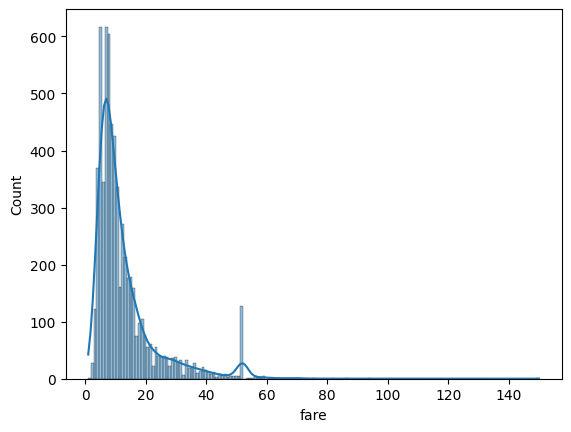

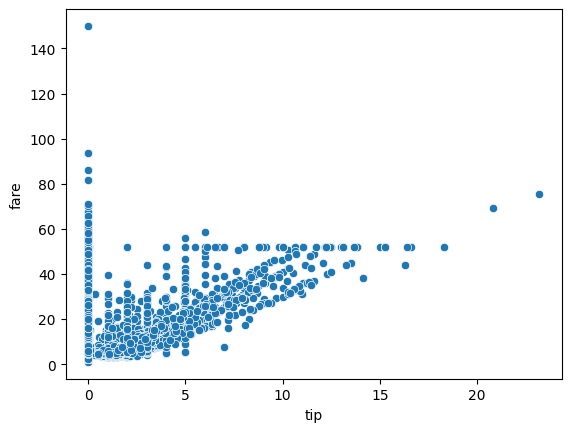

In [60]:
sns.histplot(df['fare'],kde=True)
plt.show()
sns.scatterplot(x=df.tip,y=df.fare)
plt.show()


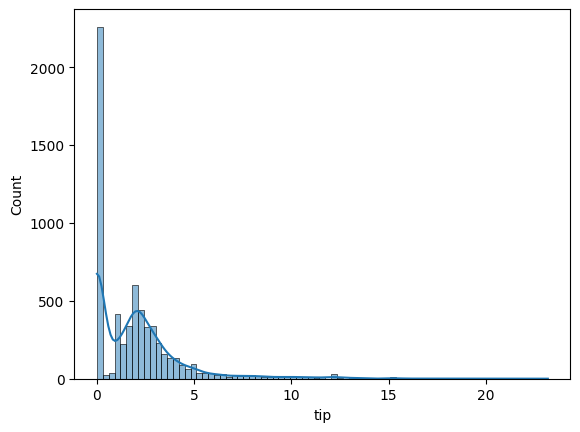

In [52]:
sns.histplot(df['tip'],kde=True)
plt.show()


###pearson and spearman

Hypotheses (correct form)

H₀ (Null hypothesis): There is no correlation between fare and tip (ρ = 0)

H₁ (Alternative hypothesis): There is a significant correlation between fare and tip (ρ ≠ 0)

###**tip vs. fare**

In [110]:
#pearson
from scipy import stats

r, p_val = stats.pearsonr(df['tip'], df['fare'])

print("Pearson correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant linear correlation exists")
else:
    print("Fail to reject null hypothesis: no significant linear correlation")


Pearson correlation: 0.48710089077355956
P-value: 0.0
Reject null hypothesis: significant linear correlation exists


- Moderate positive
- As fare increases, tip tends to increase
- Relationship is statistically significant

In [112]:
#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['fare'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")


Spearman correlation: 0.310254279563729
P-value: 1.5556730728881364e-141
Reject null hypothesis: significant monotonic correlation exists


###**tip vs. distance**

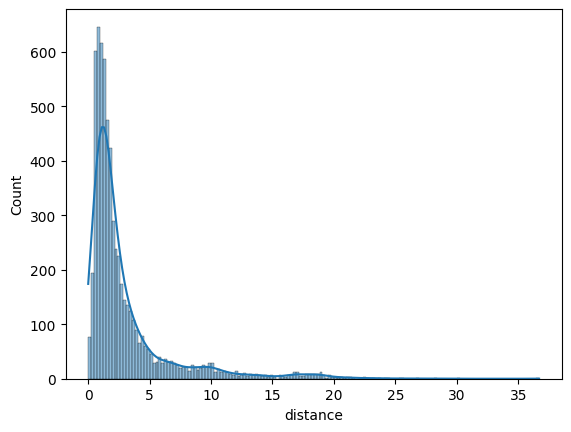

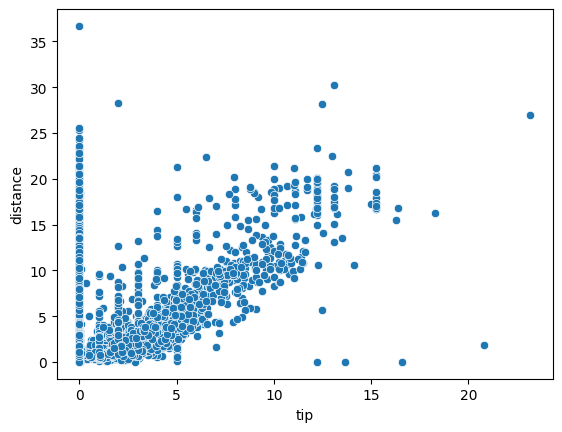

Pearson correlation: 0.4769796821455606
P-value: 0.0
Reject null hypothesis: significant linear correlation exists
Spearman correlation: 0.29265085410043695
P-value: 1.9411181331374707e-125
Reject null hypothesis: significant monotonic correlation exists


In [58]:
sns.histplot(df['distance'],kde=True)
plt.show()
sns.scatterplot(x=df.tip,y=df.distance)
plt.show()


#pearson
from scipy import stats

r, p_val = stats.pearsonr(df['tip'], df['distance'])

print("Pearson correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant linear correlation exists")
else:
    print("Fail to reject null hypothesis: no significant linear correlation")

#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['distance'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")



###**tip vs. tolls**

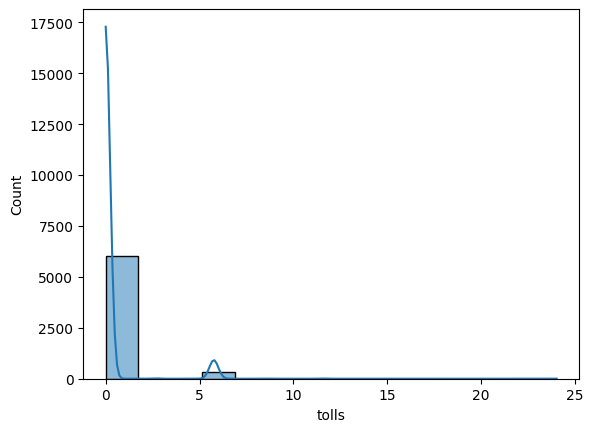

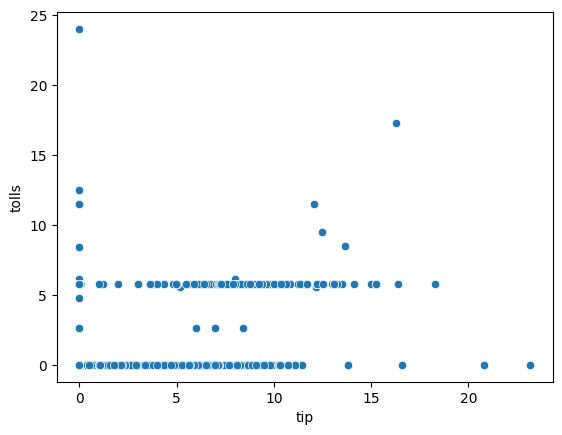

Pearson correlation: 0.41467000187389874
P-value: 4.5828986386065086e-262
Reject null hypothesis: significant linear correlation exists
Spearman correlation: 0.175380002891528
P-value: 5.643276180955435e-45
Reject null hypothesis: significant monotonic correlation exists


In [56]:
sns.histplot(df['tolls'],kde=True)
plt.show()
sns.scatterplot(x=df.tip,y=df.tolls)
plt.show()


#pearson
from scipy import stats

r, p_val = stats.pearsonr(df['tip'], df['tolls'])

print("Pearson correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant linear correlation exists")
else:
    print("Fail to reject null hypothesis: no significant linear correlation")

#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['tolls'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")



###**tip vs. total**

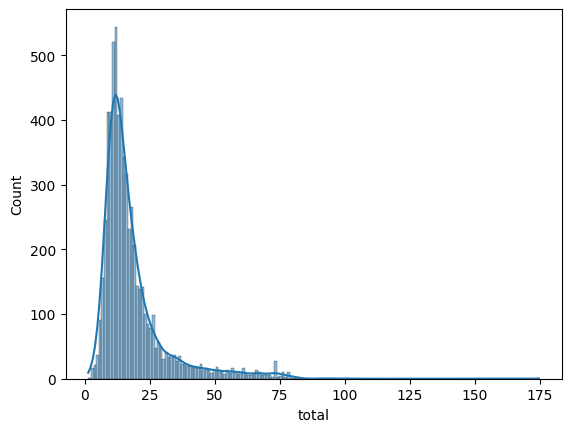

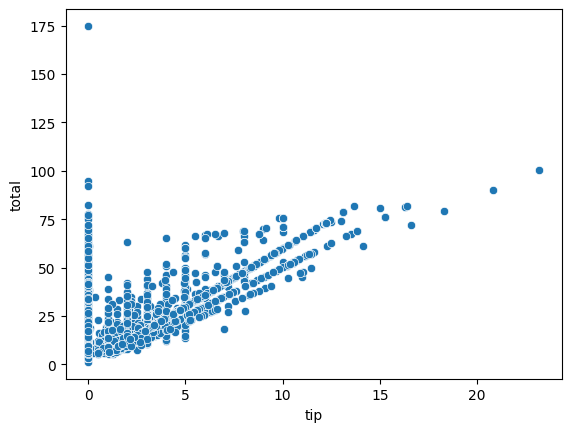

Pearson correlation: 0.6506766365313064
P-value: 0.0
Reject null hypothesis: significant linear correlation exists
Spearman correlation: 0.5028299699182296
P-value: 0.0
Reject null hypothesis: significant monotonic correlation exists


In [57]:
sns.histplot(df['total'],kde=True)
plt.show()
sns.scatterplot(x=df.tip,y=df.total)
plt.show()


#pearson
from scipy import stats

r, p_val = stats.pearsonr(df['tip'], df['total'])

print("Pearson correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant linear correlation exists")
else:
    print("Fail to reject null hypothesis: no significant linear correlation")

#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['total'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")



###**tip vs . passengers**

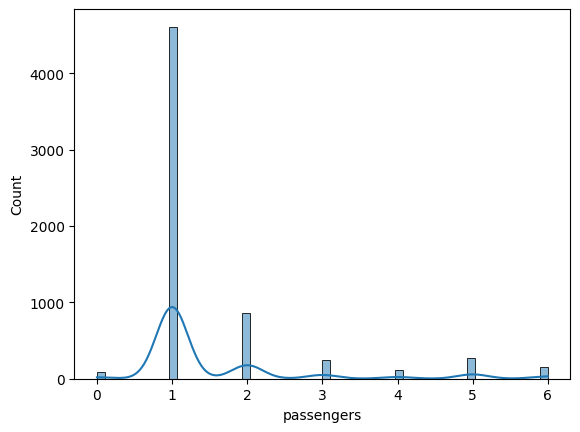

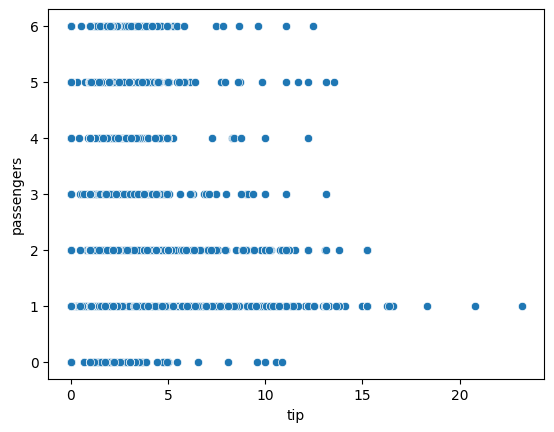

Pearson correlation: 0.017838280361313713
P-value: 0.15551969503298518
Fail to reject null hypothesis: no significant linear correlation
Spearman correlation: 0.027509812818779178
P-value: 0.028480753176042872
Reject null hypothesis: significant monotonic correlation exists


In [63]:
sns.histplot(df['passengers'],kde=True)
plt.show()
sns.scatterplot(x=df.tip,y=df.passengers)
plt.show()


#pearson
from scipy import stats

r, p_val = stats.pearsonr(df['tip'], df['passengers'])

print("Pearson correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant linear correlation exists")
else:
    print("Fail to reject null hypothesis: no significant linear correlation")

#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['passengers'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")



###skewness : -0.5to 0.5
###kutosis : 3 , >3 ,<3

In [69]:
import pandas as pd

num_cols = df.select_dtypes(include=['int64', 'float64'])

skew_kurt = pd.DataFrame({
    'Skewness': num_cols.skew(),
    'Kurtosis': num_cols.kurt()
})

skew_kurt


,Skewness,Kurtosis
passengers,2.349366,4.816700
distance,2.887023,9.793001
fare,2.606558,10.170828
tip,2.295862,8.080676
tolls,4.876125,32.159492
total,2.635966,9.672908
trip_duration_min,1.994105,5.498662


#analysis with datetime variables


In [81]:
df['pickup'].dt.day
df['pickup'].dt.month
df['pickup'].dt.month_name()
df['pickup'].dt.year
df['pickup'].dt.quarter
df['pickup'].dt.day_name()
df['pickup'].dt.weekday
df['pickup'].dt.hour
df['pickup'].dt.minute
df['pickup'].dt.second

,pickup
0,9
1,55
2,1
3,59
4,42
...,...
6428,53
6429,0
6430,18
6431,25


In [82]:
len(df['pickup'].unique())

6322

In [83]:
df['pickup_month']=df['pickup'].dt.month_name()

In [84]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_duration_min,pickup_month
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,6.250000,March
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,7.083333,March
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,7.400000,March
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,25.866667,March
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,9.533333,March


In [85]:
df['pickup_year']=df['pickup'].dt.year

In [86]:
df['pickup_day']=df['pickup'].dt.day

In [87]:
df['pickup_dayname']=df['pickup'].dt.day_name()

In [88]:
df['pickup_hour']=df['pickup'].dt.hour

In [89]:
df.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_duration_min,pickup_month,pickup_year,pickup_day,pickup_dayname,pickup_hour
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,6.250000,March,2019,23,Saturday,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,7.083333,March,2019,4,Monday,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,7.400000,March,2019,27,Wednesday,17


###relation bw

In [90]:
df.pickup_month.value_counts()

,count
pickup_month,
March,6340
February,1


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup             6341 non-null   datetime64[ns]
 1   dropoff            6341 non-null   datetime64[ns]
 2   passengers         6341 non-null   int64         
 3   distance           6341 non-null   float64       
 4   fare               6341 non-null   float64       
 5   tip                6341 non-null   float64       
 6   tolls              6341 non-null   float64       
 7   total              6341 non-null   float64       
 8   color              6341 non-null   object        
 9   payment            6341 non-null   object        
 10  pickup_zone        6341 non-null   object        
 11  dropoff_zone       6341 non-null   object        
 12  pickup_borough     6341 non-null   object        
 13  dropoff_borough    6341 non-null   object        
 14  trip_duration

In [92]:
df['dropoff_day']=df['dropoff'].dt.day

In [93]:
df['dropoff_month']=df['dropoff'].dt.month_name()

In [94]:
df['dropoff_year']=df['dropoff'].dt.year

In [95]:
df['dropoff_dayname']=df['dropoff'].dt.day_name()

In [96]:
df['dropoff_hour']=df['dropoff'].dt.hour

In [98]:
df['dropoff_minute']=df['dropoff'].dt.minute

In [100]:
df['dropoff_quarter']=df['dropoff'].dt.quarter

In [102]:
df['pickup_quarter']=df['pickup'].dt.quarter

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup             6341 non-null   datetime64[ns]
 1   dropoff            6341 non-null   datetime64[ns]
 2   passengers         6341 non-null   int64         
 3   distance           6341 non-null   float64       
 4   fare               6341 non-null   float64       
 5   tip                6341 non-null   float64       
 6   tolls              6341 non-null   float64       
 7   total              6341 non-null   float64       
 8   color              6341 non-null   object        
 9   payment            6341 non-null   object        
 10  pickup_zone        6341 non-null   object        
 11  dropoff_zone       6341 non-null   object        
 12  pickup_borough     6341 non-null   object        
 13  dropoff_borough    6341 non-null   object        
 14  trip_duration

In [105]:
df.shape

(6341, 28)

In [106]:
df.dropoff_year.value_counts()

,count
dropoff_year,
2019,6341


In [114]:
#ANOVA TEST
categories=[group['tip'].values for name,group in df.groupby('pickup_month')]
f_stat,p_val=stats.f_oneway(*categories)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

ANOVA F-statistic: 0.697669075772745
P-value: 0.4035995080175966
Fail to reject null hypothesis


In [115]:
#ANOVA TEST
categories=[group['tip'].values for name,group in df.groupby('pickup_dayname')]
f_stat,p_val=stats.f_oneway(*categories)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

ANOVA F-statistic: 1.6689152148182256
P-value: 0.1242843162257308
Fail to reject null hypothesis


In [116]:
#ANOVA TEST
categories=[group['tip'].values for name,group in df.groupby('dropoff_month')]
f_stat,p_val=stats.f_oneway(*categories)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

ANOVA F-statistic: 0.6977458764114045
P-value: 0.4977441577891454
Fail to reject null hypothesis


In [117]:
#ANOVA TEST
categories=[group['tip'].values for name,group in df.groupby('dropoff_dayname')]
f_stat,p_val=stats.f_oneway(*categories)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

ANOVA F-statistic: 1.6190096694735556
P-value: 0.13742247930087778
Fail to reject null hypothesis


In [118]:
#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['pickup_hour'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")



Spearman correlation: 0.05620765514999495
P-value: 7.517078284119937e-06
Reject null hypothesis: significant monotonic correlation exists


In [119]:
#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['pickup_day'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")



Spearman correlation: 0.00999688489379292
P-value: 0.42607920373413977
Fail to reject null hypothesis: no significant monotonic correlation


In [120]:
#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['pickup_year'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")



Spearman correlation: nan
P-value: nan
Fail to reject null hypothesis: no significant monotonic correlation


/tmp/ipython-input-3255343768.py:2: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p_val = stats.spearmanr(df['tip'], df['pickup_year'])


In [121]:
#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['dropoff_year'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")



Spearman correlation: nan
P-value: nan
Fail to reject null hypothesis: no significant monotonic correlation


/tmp/ipython-input-1170145140.py:2: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p_val = stats.spearmanr(df['tip'], df['dropoff_year'])


In [122]:
#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['dropoff_day'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")



Spearman correlation: 0.010829999394669469
P-value: 0.38854863611464274
Fail to reject null hypothesis: no significant monotonic correlation


In [123]:
#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['dropoff_hour'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")



Spearman correlation: 0.056776702660829036
P-value: 6.0707751854063095e-06
Reject null hypothesis: significant monotonic correlation exists


In [124]:
#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['dropoff_minute'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")



Spearman correlation: -0.006782156904046719
P-value: 0.5892207712099395
Fail to reject null hypothesis: no significant monotonic correlation


In [125]:
#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['dropoff_quarter'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")



Spearman correlation: -0.014378341502159876
P-value: 0.25229761827973424
Fail to reject null hypothesis: no significant monotonic correlation


In [126]:
#spearman rank correlation
r, p_val = stats.spearmanr(df['tip'], df['pickup_quarter'])

print("Spearman correlation:", r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: significant monotonic correlation exists")
else:
    print("Fail to reject null hypothesis: no significant monotonic correlation")



Spearman correlation: nan
P-value: nan
Fail to reject null hypothesis: no significant monotonic correlation


/tmp/ipython-input-3226039021.py:2: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p_val = stats.spearmanr(df['tip'], df['pickup_quarter'])
